# Etude de la densité locale sous une transition de phase

## Importation des librairies et des routines

In [20]:
# Import standard libraries
import numpy as np
from scipy.special import gamma
from scipy import sparse
import matplotlib.pyplot as plt
from matplotlib import animation, cm, colors, rc
import random
import time
from imp import reload
rc('animation', html='html5')

# Import library of our own functions
import MPCMolecularDynamics as MD
reload(MD)
from library import *

#Include plots into notebook instead of plotting them in extra window
%matplotlib inline 

print(np.__version__)

1.20.3


## Rappel de la théorie

On trie les particules via une grille, et on compte.

### Test des fonctions

In [36]:
# define system
NParticles=256
sigma = 1

# density
rho = 0.5/sigma**2
LBox = np.power(NParticles/rho,1/2)
print("LBox = ",LBox)

# define initial state
x = MD.RandomPositions(LBox,NParticles)
y = MD.RandomPositions(LBox,NParticles)

LBox =  22.627416997969522


In [37]:
CellOccupancyV1(NParticles,4,x,y,LBox,LBox,x_pbc=False,y_pbc=False,debug=False)

array([12., 15., 18., 15., 14., 21., 16., 13., 17., 14., 16., 21., 10.,
       26., 14., 14.])

### Première boucle sur un ensemble de trajectoires

In [38]:
# define initial state
x = MD.RandomPositions(LBox,NParticles)
y = MD.RandomPositions(LBox,NParticles)

x_tr = np.array([x,x,x])
y_tr = np.array([y,y,y])

x_tr_ens = np.array([x_tr,x_tr])
y_tr_ens = np.array([y_tr,y_tr])

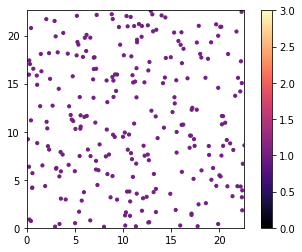

In [39]:
m = np.ones(NParticles)
MD.PlotMDConf(x_tr[-1],y_tr[-1],xBox=(0,LBox),yBox=(0,LBox),xpbc=True,ypbc=True,m=m,c=m)

In [40]:
cOcc = CellOccupancy_vec(4,x,y,LBox,LBox,x_pbc=False,y_pbc=False,debug=False)
print(cOcc.shape)
cOcc

(16,)


array([12., 17., 14., 18., 23., 19., 13., 17., 14., 17., 13., 11., 15.,
       18., 21., 14.])

In [41]:
cOcc = CellOccupancy_vec(4,x_tr,y_tr,LBox,LBox,x_pbc=False,y_pbc=False,debug=False)
print(cOcc.shape)
cOcc

(3, 16)


array([[12., 17., 14., 18., 23., 19., 13., 17., 14., 17., 13., 11., 15.,
        18., 21., 14.],
       [12., 17., 14., 18., 23., 19., 13., 17., 14., 17., 13., 11., 15.,
        18., 21., 14.],
       [12., 17., 14., 18., 23., 19., 13., 17., 14., 17., 13., 11., 15.,
        18., 21., 14.]])

In [42]:
cOcc = CellOccupancy_vec(4,x_tr_ens,y_tr_ens,LBox,LBox,x_pbc=False,y_pbc=False,debug=False)
print(cOcc.shape)
cOcc

(2, 3, 16)


array([[[12., 17., 14., 18., 23., 19., 13., 17., 14., 17., 13., 11.,
         15., 18., 21., 14.],
        [12., 17., 14., 18., 23., 19., 13., 17., 14., 17., 13., 11.,
         15., 18., 21., 14.],
        [12., 17., 14., 18., 23., 19., 13., 17., 14., 17., 13., 11.,
         15., 18., 21., 14.]],

       [[12., 17., 14., 18., 23., 19., 13., 17., 14., 17., 13., 11.,
         15., 18., 21., 14.],
        [12., 17., 14., 18., 23., 19., 13., 17., 14., 17., 13., 11.,
         15., 18., 21., 14.],
        [12., 17., 14., 18., 23., 19., 13., 17., 14., 17., 13., 11.,
         15., 18., 21., 14.]]])

On a integré toutes ces fonctions dans *CellOccupancy*

Marche pour des boîtes assymétriques.

In [43]:
cOcc = CellOccupancy(4,x,y,LBox,LBox,x_pbc=False,y_pbc=False,debug=False)
print(cOcc.shape)
cOcc

(16,)


array([12., 17., 14., 18., 23., 19., 13., 17., 14., 17., 13., 11., 15.,
       18., 21., 14.])

In [44]:
cOcc = CellOccupancy(4,x_tr,y_tr,LBox,LBox,x_pbc=False,y_pbc=False,debug=False)
print(cOcc.shape)
cOcc

(3, 16)


array([[12., 17., 14., 18., 23., 19., 13., 17., 14., 17., 13., 11., 15.,
        18., 21., 14.],
       [12., 17., 14., 18., 23., 19., 13., 17., 14., 17., 13., 11., 15.,
        18., 21., 14.],
       [12., 17., 14., 18., 23., 19., 13., 17., 14., 17., 13., 11., 15.,
        18., 21., 14.]])

In [45]:
cOcc = CellOccupancy(4,x_tr_ens,y_tr_ens,LBox,LBox,x_pbc=False,y_pbc=False,debug=False)
print(cOcc.shape)
cOcc

(2, 3, 16)


array([[[12., 17., 14., 18., 23., 19., 13., 17., 14., 17., 13., 11.,
         15., 18., 21., 14.],
        [12., 17., 14., 18., 23., 19., 13., 17., 14., 17., 13., 11.,
         15., 18., 21., 14.],
        [12., 17., 14., 18., 23., 19., 13., 17., 14., 17., 13., 11.,
         15., 18., 21., 14.]],

       [[12., 17., 14., 18., 23., 19., 13., 17., 14., 17., 13., 11.,
         15., 18., 21., 14.],
        [12., 17., 14., 18., 23., 19., 13., 17., 14., 17., 13., 11.,
         15., 18., 21., 14.],
        [12., 17., 14., 18., 23., 19., 13., 17., 14., 17., 13., 11.,
         15., 18., 21., 14.]]])

## Densité locale pour une trajectoire dans l'espace des phases

In [66]:
# define system
d=2
NParticles=256
kT = 0.34
m = np.ones(NParticles)

# Lennard-Jones
sigma = 1
epsilon = 1
tau = sigma*np.sqrt(m[0]/epsilon) #unit of time
print('tau=',tau)

# choose density
rho = 0.5/sigma**d
print('Densité=', rho, 'sigma**',d)
LBox = np.power(NParticles/rho,1./d)
print("LBox = ",LBox)

# define the length of the trajectory
run_time = 100. * tau

# generate trajectories and measure execution time
initialWallTime = time.perf_counter()

( t_tr, x_tr, y_tr, vx_tr, vy_tr, uPot_tr, uKin_tr, pPot_tr, pKin_tr, pHyper_tr, [t,x,y,vx,vy] 
) = Generate_LJ_NVT_MolecularDynamics_Trajectory(d,m,LBox,kT,run_time)

print("Execution time: ",time.perf_counter() - initialWallTime)

tau= 1.0
Densité= 0.5 sigma** 2
LBox =  22.627416997969522
Execution time:  613.1267462740002


In [67]:
#!! PERIODIC BOUNDARY CONDITIONS
nOcc_tr = CellOccupancy(4,x_tr,y_tr,LBox,LBox,x_pbc=True,y_pbc=True,debug=False)

In [68]:
nOcc_hist, nOcc_bin_edges = np.histogram(nOcc_tr, 101, (-0.5,100.5), normed=None, weights=None, density=True)

Text(0, 0.5, 'p(n)')

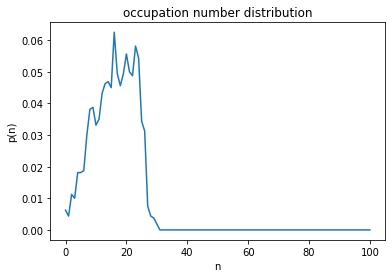

In [69]:
plt.plot(MD.BinCenters(nOcc_bin_edges),nOcc_hist)
plt.title("occupation number distribution")
plt.xlabel("n")
plt.ylabel("p(n)")

In [70]:
np.sum(nOcc_hist)

1.0

The pair correlation function reveals, that there is no structure.

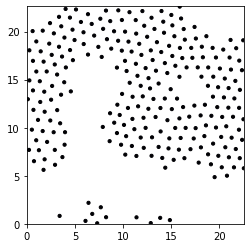

In [71]:
MD.PlotMDConf(x_tr[-1],y_tr[-1],xBox=(0,LBox),yBox=(0,LBox),xpbc=True,ypbc=True,m=m)

## To do

Formalize the relation between the fluctuations in the occupation number and the compressibility.

### Génération d'un ensemble de trajectoires à $kT$ et $\rho$ fixés

In [72]:
# define system
NParticles=16
d=2
kT = .5
m = np.ones(NParticles)
sigma = 1
epsilon = 1
#unit of time
tau = sigma*np.sqrt(m[0]/epsilon)      

# density
rho = 0.5/sigma**d
LBox = np.power(NParticles/rho,1/2)
print('kT=',kT)
print('rho=',rho)
print("LBox = ",LBox)

# define the length of the trajectory
run_time = 100. * tau

# define number of independent trajectories
NTrajectories = 5
print('Nombre de simulations:', NTrajectories)

# generate trajectories and measure execution time
initialWallTime = time.perf_counter()

(t_tr_ens, x_tr_ens, y_tr_ens, vx_tr_ens, vy_tr_ens,
 uPot_tr_ens, uKin_tr_ens, pPot_tr_ens, pKin_tr_ens, pHyper_tr_ens,
 list_of_starting_configurations
) = Generate_Ensemble_of_LJ_NVT_MolecularDynamics_Trajectories(d,m,LBox,kT,NTrajectories,run_time)

print("Execution time: ",time.perf_counter() - initialWallTime)

kT= 0.5
rho= 0.5
LBox =  5.656854249492381
Nombre de simulations: 5
Execution time:  91.82171866399949


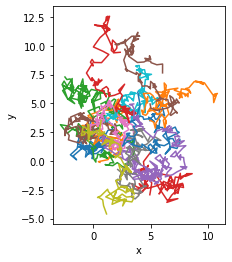

In [73]:
#Tracé de la trajectoire des particules pour 1 simulation, check up
ax = plt.axes()
Traj=1
MD.AddParticleTraces(ax,x_tr_ens[Traj],y_tr_ens[Traj],range(NParticles))
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_aspect(1)
plt.show()

In [74]:
nOcc_tr = CellOccupancy(4,x_tr_ens,y_tr_ens,LBox,LBox,x_pbc=True,y_pbc=True,debug=False)

In [75]:
nOcc_hist, nOcc_bin_edges = np.histogram(nOcc_tr, 101, (-0.5,100.5), normed=None, weights=None, density=True)

Text(0, 0.5, 'p(n)')

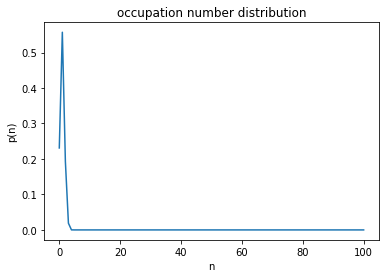

In [76]:
plt.plot(MD.BinCenters(nOcc_bin_edges),nOcc_hist)
plt.title("occupation number distribution")
plt.xlabel("n")
plt.ylabel("p(n)")

In [77]:
np.sum(nOcc_hist)

1.0